In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import skrf as rf

In [3]:
def data_to_network(file_name, freq, mag, phase):
        s = np.zeros((len(freq), 2, 2), dtype=complex)
        fn = file_name.lower()
        if 's11' in fn or 'open' in fn or 'short' in fn or 'load' in fn or 'one' in fn:
            s[:, 0, 0] = rf.dbdeg_2_reim(mag, phase)
        elif 's21' in fn or 'thru' in fn or 'through' in fn or 'two' in fn:
            s[:, 1, 0] = rf.dbdeg_2_reim(mag, phase)
        else:
            print("Unable to determine S param, please add to file name and try again.")

        return rf.Network(f=freq, s=s, name=file_name, f_unit="Hz")

def load(file_name):
        """ Loads CSV or touchstone from file. """
        try:
            network = rf.Network(file_name, f_unit="Hz")
            network.name = file_name

        except:
            try:
                data = np.loadtxt(file_name, delimiter=",")
                freq = data[:, 0]
                mag = data[:, 1]
                phase = data[:, 2]
                network = data_to_network(file_name, freq, mag, phase)
                network.name = file_name
            except:
                print("Sorry, file {} unable to be loaded.".format(file_name))
        return network
                
                
def plot_mag(network):
        """ Plots magnitude vs frequency. """
        fn = network.name.lower()
        network.f = network.f * 1E-6
        if 's11' in fn or 'short' in fn or 'open' in fn or 'load' in fn or 'one' in fn:
            network.plot_s_db(m=0, n=0, label="S11 {}".format(network.name))
        elif 's21' in fn or 'through' in fn or 'thru' in fn or 'two' in fn:
            network.plot_s_db(m=1, n=0, label="S21 {}".format(network.name))
        else:
            var = input("Unable to determine S param, please enter S11 or S21")
            network.plot_s_db(m=1, n=0, label=var)
            
        network.f = network.f * 1E6
        plt.xlabel("Frequency (MHz)")
        plt.title(title)
        plt.show()

def plot_smith(network):
        """ Plots Smith Chart. """
        
        network.plot_s_smith(m=0, n=0, label="S11 {}".format(network.name))

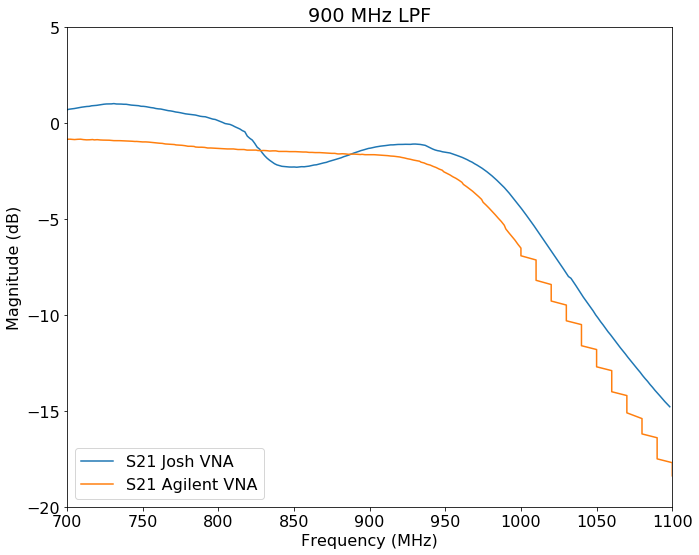

In [5]:
josh = load("900_josh_s21.s2p")
josh.f = josh.f * 1E-6
tiny = load("data/agilent_vna/filter900s21.csv")
tiny.f = tiny.f * 1E-6

# plt.xkcd()
plt.figure(figsize=(10.0, 8.0))
# josh.plot_s_smith(m=0, n=0, label="S11 Josh VNA")
# tiny.plot_s_smith(m=0, n=0, label="S11 NanoVNA")
josh.plot_s_db(m=1, n=0, label="S21 Josh VNA")
tiny.plot_s_db(m=1, n=0, label="S21 Agilent VNA")

plt.rcParams.update({'font.size': 16})
plt.xlim([700, 1100])
plt.ylim([-20, 5])
plt.xlabel("Frequency (MHz)")
plt.title("900 MHz LPF")
plt.legend(loc='lower left')

plt.tight_layout()
plt.savefig("900_MHz_LPF_s21")